We will start with importing data bookings.csv and test it for stationarity and then perform varoius methods to stationarize and make forecasts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
hotel=pd.read_csv("bookings.csv")

In [3]:
hotel.head(2)

,Year,Month,Bookings
0,2006,Jan,383
1,2006,Feb,366


In [4]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      120 non-null    int64 
 1   Month     120 non-null    object
 2   Bookings  120 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.9+ KB


In [5]:
#The data contains a particular month and number of guestswho have booked rooms in a hotel in  that month.
#But this is still not read as a TS object as the data types are ‘object’ and ‘int’.
#In order to read the data as a time series, we have to pass special arguments to the read_csv command:

In [10]:
#We will concatenate year and month to create a variable which contains actual date of booking stay
#We will create a string type of field first
hotel['Year_Mon']="1-"+hotel['Month']+"-"+hotel['Year'].map(str)

In [14]:
hotel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Year      120 non-null    int64         
 1   Month     120 non-null    object        
 2   Bookings  120 non-null    int64         
 3   Year_Mon  120 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.9+ KB


In [11]:

hotel.head()

,Year,Month,Bookings,Year_Mon
0,2006,Jan,383,1-Jan-2006
1,2006,Feb,366,1-Feb-2006
2,2006,Mar,250,1-Mar-2006
3,2006,Apr,318,1-Apr-2006
4,2006,May,334,1-May-2006


In [12]:
#Now we will convert that field to datetime
hotel['Year_Mon']=pd.to_datetime(hotel['Year_Mon'])

In [15]:
hotel.info()
#We can see that the variable is now datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Year      120 non-null    int64         
 1   Month     120 non-null    object        
 2   Bookings  120 non-null    int64         
 3   Year_Mon  120 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.9+ KB


In [16]:
hotel.head()

,Year,Month,Bookings,Year_Mon
0,2006,Jan,383,2006-01-01
1,2006,Feb,366,2006-02-01
2,2006,Mar,250,2006-03-01
3,2006,Apr,318,2006-04-01
4,2006,May,334,2006-05-01


In [17]:
hotel=hotel.drop(columns=['Year','Month'])

In [18]:
hotel.head()

,Bookings,Year_Mon
0,383,2006-01-01
1,366,2006-02-01
2,250,2006-03-01
3,318,2006-04-01
4,334,2006-05-01


In [19]:
ts = hotel.set_index('Year_Mon')
#by setting this variable as index we will indicate this field will act as time variable

In [20]:
type(ts)

pandas.core.frame.DataFrame

In [21]:
ts.index

DatetimeIndex(['2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='Year_Mon', length=120, freq=None)

In [22]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 8

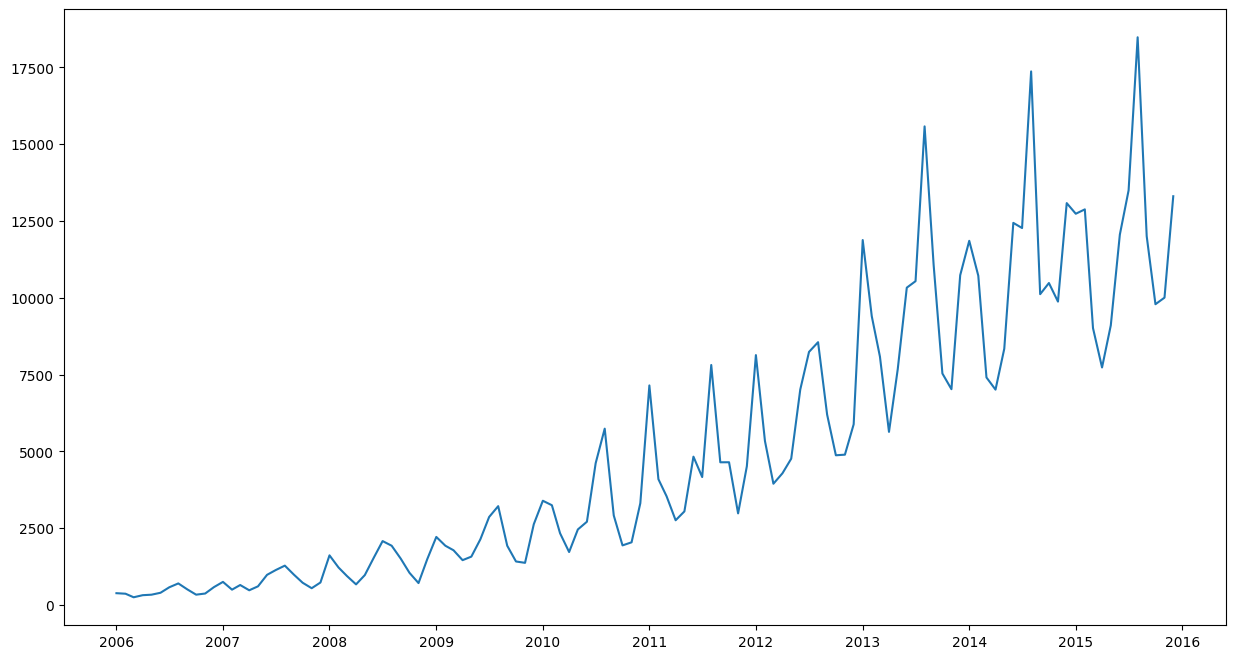

In [23]:
plt.plot(ts)

In [24]:
ts.head()

,Bookings
Year_Mon,
2006-01-01,383
2006-02-01,366
2006-03-01,250
2006-04-01,318
2006-05-01,334


In [25]:
#Before building a Time Series Model and making forecasts it is important that we ascertain that the series is stationary,
#so that forecasts are reliable
# Check Stationarity of a Time Series

#Dickey-Fuller Test: This is one of the statistical tests for checking stationarity.
#Here the null hypothesis is that the TS is non-stationary.
#The test results comprise of a Test Statistic and some Critical Values for difference confidence levels.
#If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series
#is stationary.
#Refer this article for details.


#autolog = Method to use when automatically determining the lag

from statsmodels.tsa.stattools import adfuller


def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

     #Perform Dickey-Fuller test:

    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts['Bookings'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)


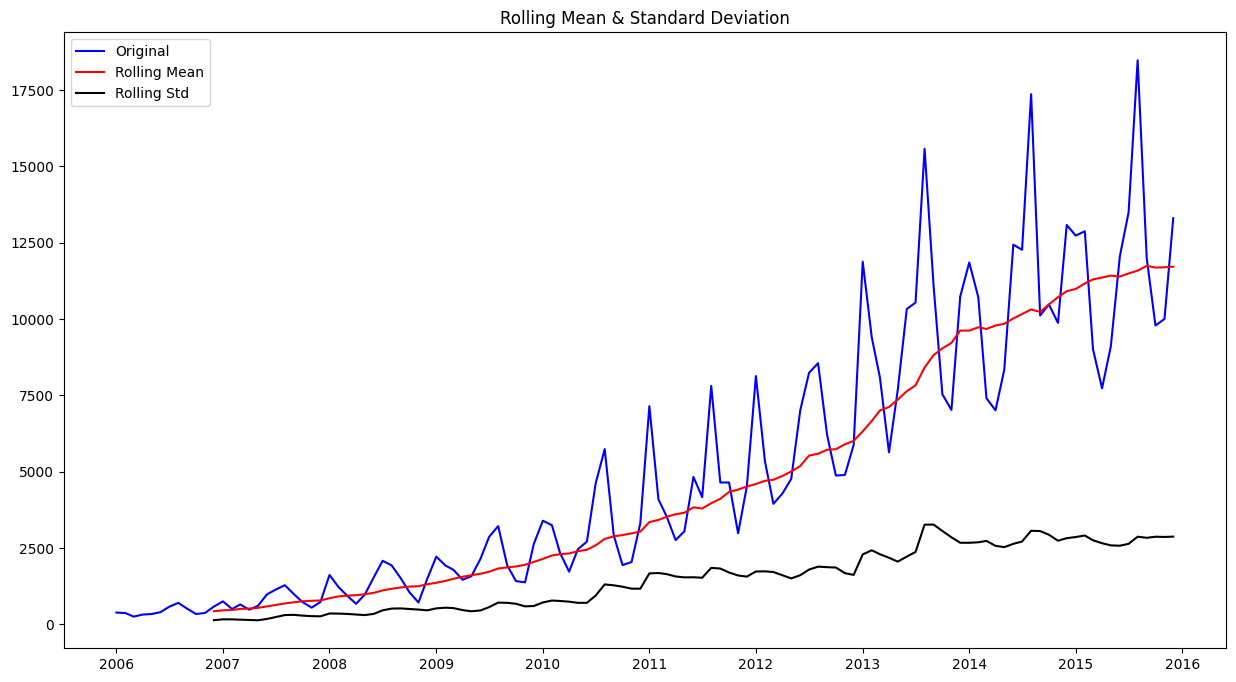

Results of Dickey-Fuller Test:
Test Statistic                   0.983756
p-value                          0.994092
#Lags Used                      13.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


In [26]:
test_stationarity(ts)

In [27]:
#p-value is more than 0.05 (5% level of significance) which means the NULL-Hypothesis that the series is not stationary cannot be
#rejected
#Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a
#stationary series.

#Also, the test statistic is way more than the critical values.


In [29]:
#How to make a Time Series Stationary?

#Though stationarity assumption is taken in many TS models, almost none of practical time series are stationary.
#So statisticians have figured out ways to make series stationary, which we’ll discuss now.
#Actually, its almost impossible to make a series perfectly stationary, but we try to take it as close as possible.

#Lets understand what is making a TS non-stationary. There are 2 major reasons behind non-stationaruty of a TS:
#1. Trend – varying mean over time. For eg, in this case we saw that on average, the number of bookings
#was growing over time.

#2. Seasonality – variations at specific time-frames. eg people might have a tendency to book more in
#particular month because of pay increment or festivals.

#The underlying principle is to model or estimate the trend and seasonality in the series and
#remove those from the series to get a stationary series. Then statistical forecasting techniques
#can be implemented on this series. The final step would be to convert the forecasted values into
#the original scale by applying trend and seasonality constraints back.


In [30]:
#Estimating & Eliminating Trend

#Multiple approaches -

#1) Tranformation - apply some transformation like log,square root etc
#2) Aggregation  - taking average for a time period like monthly/weekly averages
#3) Smoothing - Applying weights to time points based on certain method






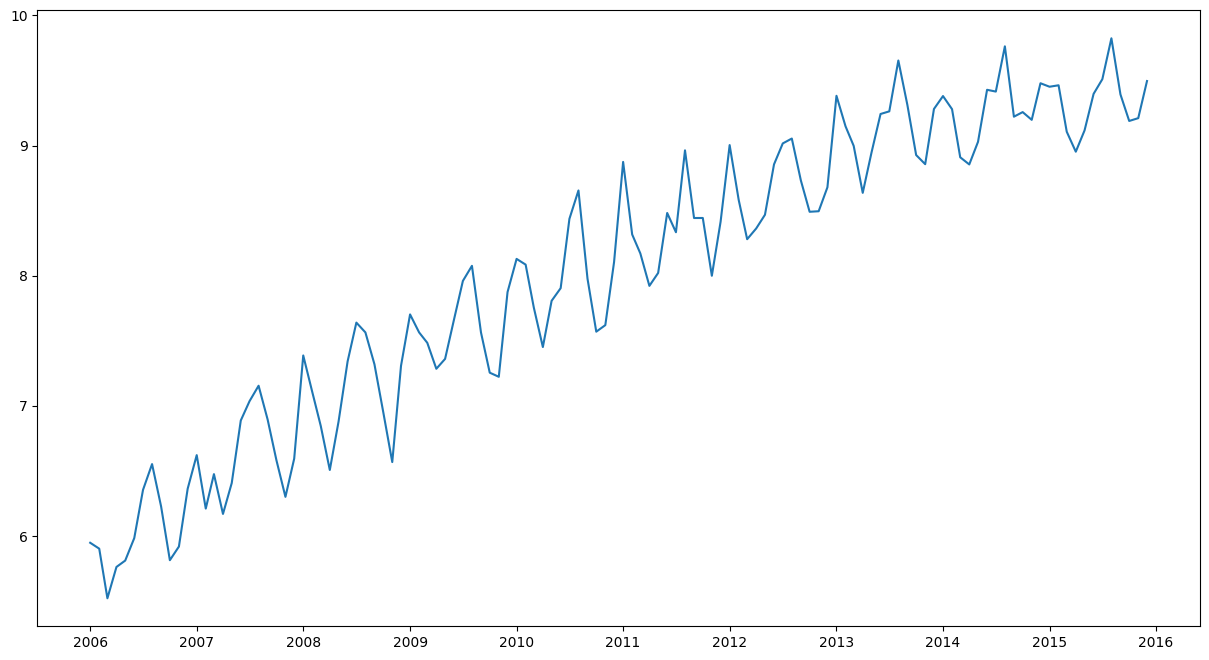

In [31]:
#One of the first tricks to reduce trend can be transformation.
#For example, in this case we can clearly see that the there is a significant positive trend.
#So we can apply transformation which penalize higher values more than smaller values.
#These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity:


ts_log = np.log(ts)
plt.plot(ts_log)

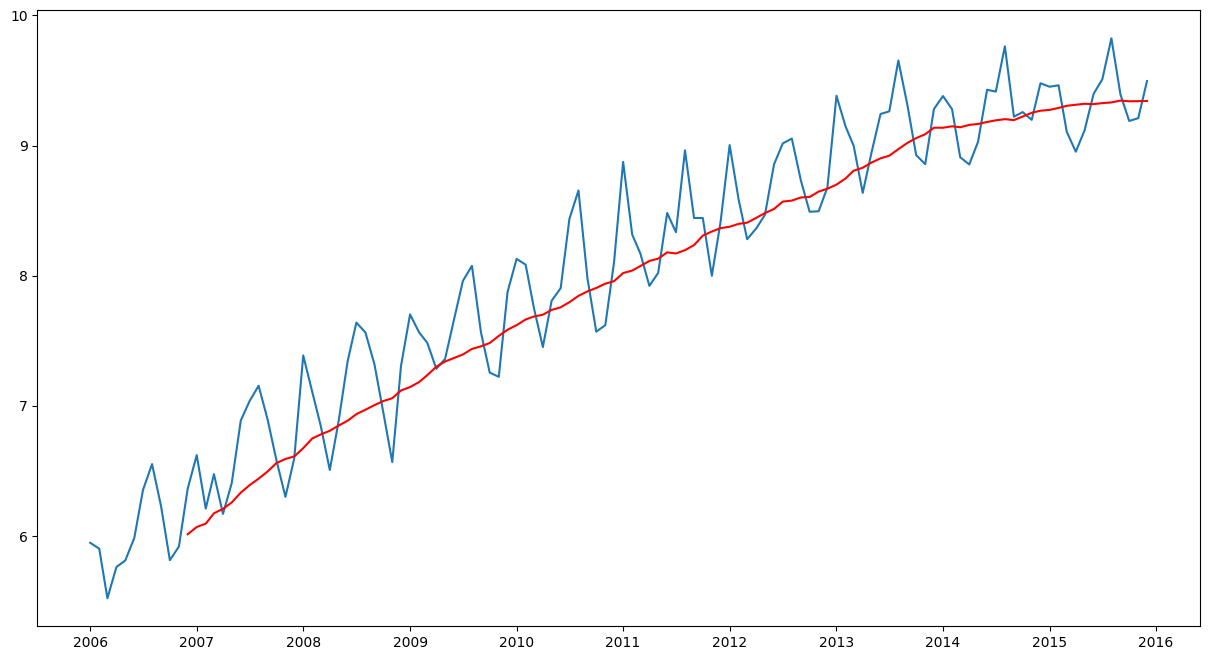

In [32]:
#Moving average

#In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series.
#Here we can take the average over the past 1 year, i.e. last 12 values.

moving_avg = ts_log.Bookings.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [33]:
moving_avg.head(30)

Year_Mon
2006-01-01         NaN
2006-02-01         NaN
2006-03-01         NaN
2006-04-01         NaN
2006-05-01         NaN
2006-06-01         NaN
2006-07-01         NaN
2006-08-01         NaN
2006-09-01         NaN
2006-10-01         NaN
2006-11-01         NaN
2006-12-01    6.013227
2007-01-01    6.069341
2007-02-01    6.095005
2007-03-01    6.174503
2007-04-01    6.208466
2007-05-01    6.258111
2007-06-01    6.333412
2007-07-01    6.390227
2007-08-01    6.440403
2007-09-01    6.496081
2007-10-01    6.560187
2007-11-01    6.592012
2007-12-01    6.611294
2008-01-01    6.675101
2008-02-01    6.749700
2008-03-01    6.780570
2008-04-01    6.808709
2008-05-01    6.848082
2008-06-01    6.885910
Name: Bookings, dtype: float64